# Playing with Audio in Python

In this activity, we'll look at reading in audio from Python and doing basic analysis of it.

In [46]:
import numpy as np
from scipy.io import wavfile
from scipy import fft
from scipy import signal
from matplotlib import cm
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.fft import fftshift

Let's read in our audio files.

In [123]:
sr200,data200 = wavfile.read('sounds/200Hz.wav')
sr800warb,data800warb = wavfile.read('sounds/800warble.wav')
sr800pure,data800pure = wavfile.read('sounds/800pure.wav')
sr800pulse,data800pulse = wavfile.read('sounds/800pulse.wav')
srnoise,datanoise = wavfile.read('sounds/noise.wav')
srthanks_orig,datathanks_orig = wavfile.read('sounds/thanks_orig.wav')
srthanks_sws,datathanks_sws = wavfile.read('sounds/thanks_sws.wav')

**Take a look at the data200 object associated with the 200Hz.wav file, and see what its structure and contents are.**

**Use the length of the data200 object associated with the 200Hz.wav file and the sample rate to deterimine the length of the sound.**  Explain to your neighbor why that works.

Now, you can create a player object to listen to the sound like so:

In [53]:
ipd.Audio('sounds/200Hz.wav')

Now **plot the waveform** just using matplotlib.  You'll want to zoom in to a smaller part of the plot using `plt.xlim(lowerbound,higherbound)` to be able to see the wave more directly.

(0.0, 1000.0)

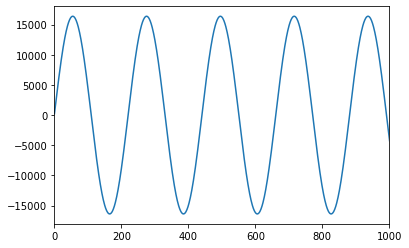

Now, let's **make a spectrogram of this signal**.  The filename says "200Hz", is this really a 200Hz wave?  Use `plt.ylim()` as above to zoom in.  Note the use of `data200` as the input dataset and `sr200` as the sample rate, you'll need to enter both for future models.  I've given you the code below to do this.

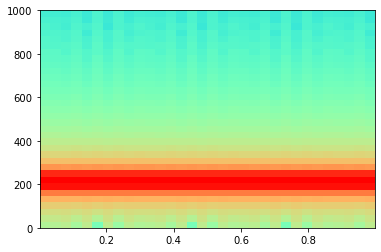

In [93]:
plt.specgram(data200,Fs=sr200,NFFT=1500,cmap="rainbow",scale="dB");
plt.ylim(0,1000);

That was a static frequency.  If you'd like, make a playback box and listen.  What happens when the frequency shifts around?  

To examine this, **make an identical spectrogram for the `800warble.wav` file**.  What do you see about the frequency here?

Spectrograms always have a tradeoff between displaying time and frequency. The above spectrograms use `NFFT=1500`.  This means that every line means that every slice in the spectrogram is built from 1500 individual NFTs.  That's going to give us a great understanding of what the frequencies are, but weird information about precise timing.

Now, **recreate the spectrogram for 800warble.wav, but use `NFFT=250`**.  How does this change what you see? Are you seeing better or worse frequency resolution? (*Hint: You'll need to adjust `ylim`*)

Sometimes, getting more detailed frequency information leads to *bad* information at temporal edges.  First, **create a Spectrogram of 800pulse with `NFFT=250`**.  See what's going on in the data.  Also, don't worry about 'divide by zero' warnings, they're reasonable here.  If you're confused by what you see, listen to the sound file.

Now **create a Spectrogram of 800pulse with `NFFT=2500`**.  You expect the frequency resolution to change.  What's unexpected here?

*Important note: The only sound here is an 800Hz sine wave.  There are no other real frequencies present*

Now, let's look at speech!  Now **plot the waveform** of `noise.wav` just using matplotlib. You'll see a few distinct areas of amplitude (e.g. sub-shapes).

Now **plot a spectrogram** of `noise.wav` with `NFFT=2500`.  Limit your spectrogram to 5000 Hz.

You'll see that this looks very different from what you've seen so far.  You'll also notice that those distinct areas you saw in the waveform aren't so strongly visible here.  Let's play with that frequency/time tradeoff more. **Plot a second spectrogram** of `noise.wav` where `NFFT=256`.  Do you see the 'regions' from the waveform now?

Interestingly, those rapid, repeated vertical lines are individual openings and closings of the speaker's vocal folds.  Fun!  

OK, now let's take a look at one really neat perceptual phenomenon.  **Listen to `thanks_sws.wav`, a number of times, until you think you understand speech**.  Write down what you think you hear.

Now, **make a spectrogram of `thanks_sws.wav`** using `NFFTS=1000`.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


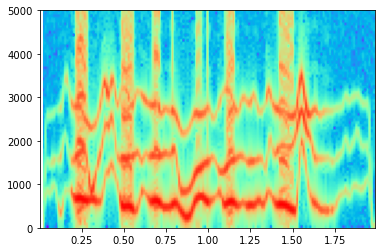

In [127]:
plt.specgram(datathanks_sws,Fs=srthanks_sws,NFFT=700,cmap="rainbow",scale="dB");
plt.ylim(0,5000);


This is 'sine wave speech', which mimics human speech by mapping (in this case 3) sine waves onto the loudest parts of the spectrum.  Let's see how it looks relative to the actual sentence. OK, now let's take a look at one really neat perceptual phenomenon. First, **listen to `thanks_orig.wav`.  Then listen to the `thanks_sws.wav` file, and see if your perception changes.**

Now, **make a spectrogram of `thanks_orig.wav`** using `NFFTS=1000`.  **Compare this spectrogram to the sine waves above, and see if they seem to 'overlap', with the most intense areas being shown next to one another.**

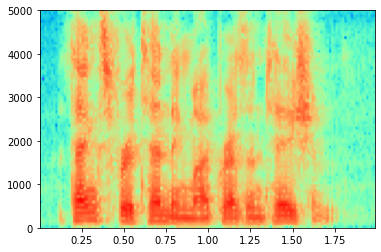

In [152]:
plt.specgram(datathanks_orig,Fs=srthanks_orig,NFFT=700,cmap="rainbow",scale="dB");
plt.ylim(0,5000);



Here's another way to look at differences between plots.  **Read the below code, understand it, and explain why it works.**  Then play with the alpha parameters.

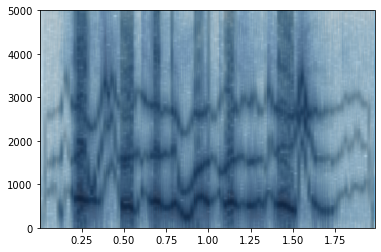

In [161]:
plt.specgram(datathanks_orig,Fs=srthanks_orig,NFFT=256,cmap="Blues",scale="dB",alpha=0.9);
plt.specgram(datathanks_sws,Fs=srthanks_sws,NFFT=1000,cmap="binary",scale="dB",alpha=0.5);
plt.ylim(0,5000);
plt.show()

Congrats!  You can now make spectrograms in Python!  Well done!